## Over-sampling

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
from collections import Counter
X, y = datasets.make_classification(
            n_samples     = 4000,  # number of data points
            n_classes     = 2,      # number of classes
            n_clusters_per_class=2, # The number of clusters per class 
            weights       = [0.03,0.97], # The proportions assigned to each class
            n_features    = 10,     # number of total features 
            n_informative = 2,      # number of informative features 
            n_redundant   = 2,      # number of redundant features
            random_state  = 0                       )
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('Training dataset shape {}'.format(Counter(y_train)))

Training dataset shape Counter({1: 2590, 0: 90})


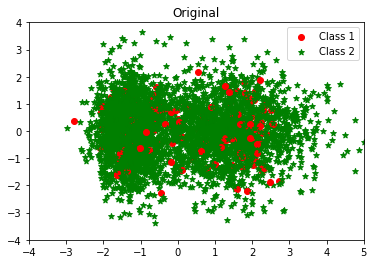

In [2]:
from sklearn.decomposition import PCA
import pylab as pl
def plot_this(X_rs,y_rs,method):
  # Use principal component to condense the 10 features to 2 features
  pca = PCA(n_components=2).fit(X_rs)
  pca_2d = pca.transform(X_rs)
  # Assign colors
  for i in range(0, pca_2d.shape[0]):
    if y_rs[i] == 0:
      c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='o')
    elif y_rs[i] == 1:
      c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='*')  
  pl.legend([c1, c2], ['Class 1', 'Class 2'])
  pl.title(method)
  pl.axis([-4, 5, -4, 4])  # x axis (-4,5), y axis (-4,4)
  pl.show()
    
plot_this(X,y,'Original')

### (A) Random Over-sampling

RandomOverSampler Counter({1: 2590, 0: 300})


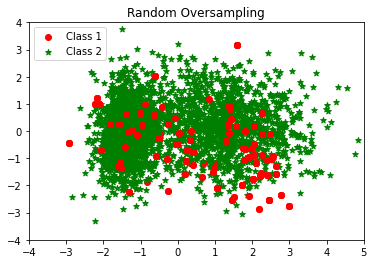

In [5]:
from imblearn.over_sampling import (RandomOverSampler, 
                                    SMOTE, 
                                    ADASYN)
# RandomOverSampler
  # With over-sampling methods, the number of samples in a class
  # should be greater or equal to the original number of samples.
sampler = RandomOverSampler(sampling_strategy={1: 2590, 0: 300})
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('RandomOverSampler {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs, 'Random Oversampling')

### (B) SMOTE

SMOTE Counter({1: 2590, 0: 300})


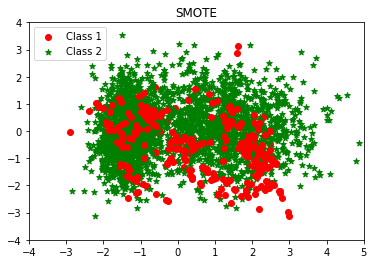

In [6]:
# SMOTE
sampler = SMOTE(sampling_strategy={1: 2590, 0: 300})
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('SMOTE {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs,'SMOTE')

### (C) ADASYN

ADASYN Counter({1: 2590, 0: 300})


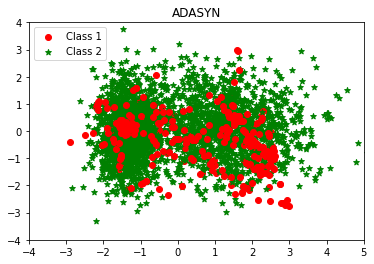

In [9]:
# ADASYN
sampler = ADASYN(sampling_strategy={1: 2590, 0: 300})
X_rs, y_rs = sampler.fit_resample(X_train, y_train)
print('ADASYN {}'.format(Counter(y_rs)))
plot_this(X_rs,y_rs,'ADASYN')